In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [127]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [128]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
df.shape

(42000, 785)

In [130]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1406,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23125,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33769,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11819,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


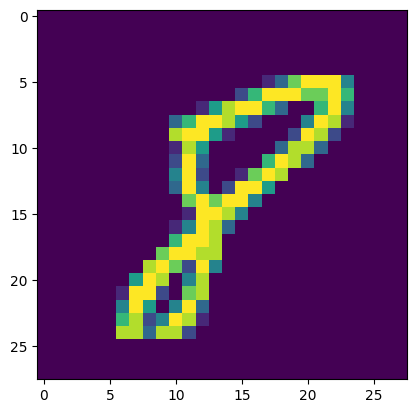

In [131]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

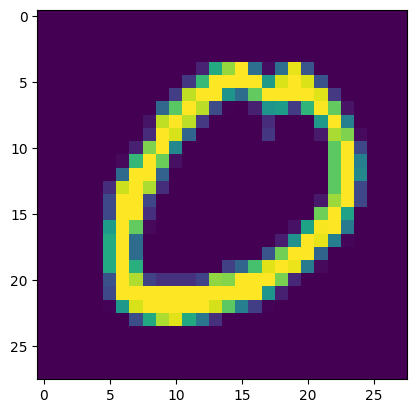

In [132]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

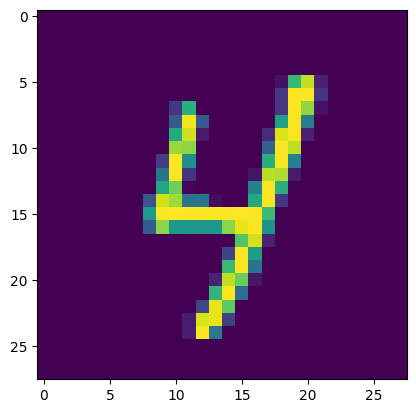

In [133]:
plt.imshow(df.iloc[17809,1:].values.reshape(28,28))

In [134]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [136]:
X_train.shape

(33600, 784)

In [137]:
X_test.shape

(8400, 784)

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
knn = KNeighborsClassifier()

In [140]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [141]:
import time
start = time.time()
Y_pred = knn.predict(X_test)
print(time.time() - start)

13.22953987121582


In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9648809523809524

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [144]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [146]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [147]:
X_train.shape

(33600, 784)

In [148]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)  #Taking best 100 key componts

In [ ]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf.shape

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,Y_train)

In [ ]:
Y_pred = knn.predict(X_test_trf)

In [ ]:
accuracy_score(Y_test,Y_pred)

In [ ]:
# for i in range(1,785):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)
    
#     knn = KNeighborsClassifier()

#     knn.fit(X_train_trf,Y_train)
    
#     Y_pred = knn.predict(X_test_trf)
    
#     print(accuracy_score(Y_test,Y_pred))

In [ ]:
#transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
Y_train_trf = Y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=Y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
#transforming to a 3D coordinate system
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
X_train_trf

In [ ]:
import plotly.express as px
Y_train_trf = Y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                 color=Y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
                 
            
fig.show()

In [ ]:
#Eigen_values
pca.explained_variance_

In [ ]:
#Eigen Matrix
pca.components_.shape

In [ ]:
#Calculate percentage
pca.explained_variance_ratio_

In [ ]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
pca.explained_variance_.shape

In [ ]:
pca.components_.shape

In [ ]:
#Calculate percentage
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))